# Titanic Survival Prediction Using Machine Learning

![titanic_image](https://upload.wikimedia.org/wikipedia/commons/4/42/Titanic_Sn1912.jpg)

In [0]:
#Description: This program predicts if a passenger will survive on the titanic
#
#Resources: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
#           http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf
#           https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#Count the number of rows and columns in the data set
titanic.shape

(891, 15)

In [4]:
#Get some statistics from our data set, count, mean standard deviation etc.
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Get a count of the number of survivors 
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

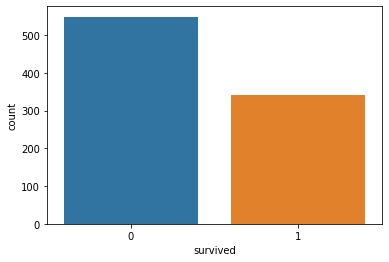

In [6]:
#Visualize the count of number of survivors
sns.countplot(titanic['survived'],label="Count")

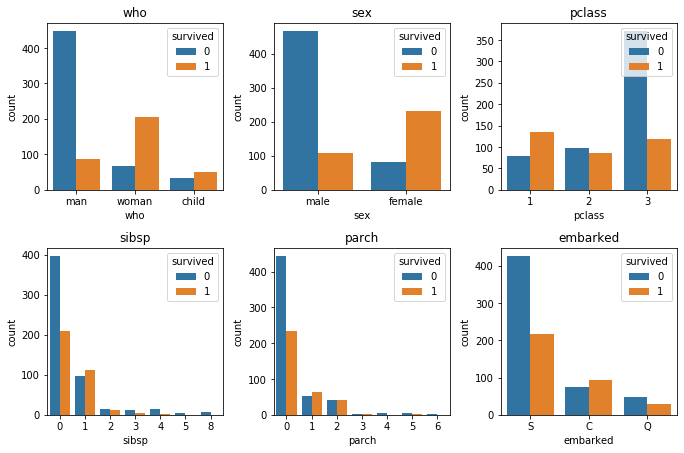

In [7]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#Number of rows/columns of the subplot grid and the figure size of each graph
#NOTE: This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

In [8]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [9]:
#Look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


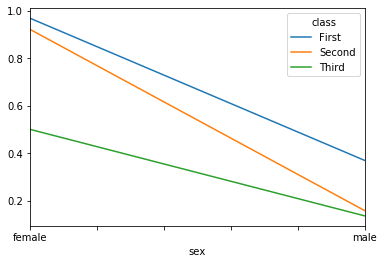

In [10]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

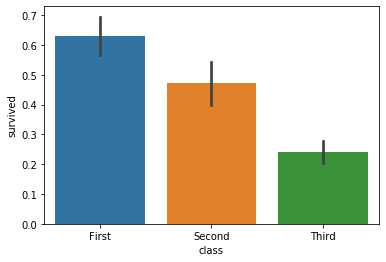

In [11]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [199]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

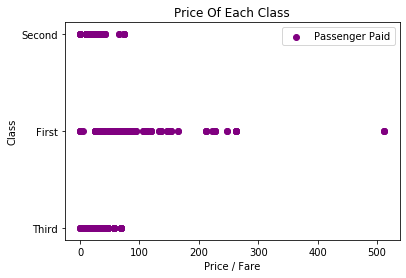

In [12]:
#Plot the Prices Paid Of Each Class
plt.scatter(titanic['fare'], titanic['class'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [13]:
#Count the empty (NaN, NAN, na) values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
#Look at all of the values in each column & get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [15]:
#DROP REDUNDENT COLUMNS & REMOVE EMPTY ROWS
#embark_town = embarked
#alive = survived
#class = pclass

#alone = (sibsp or parch) meaning if you have siblings/spouses or parents/children on board than you are not alone else you are
#adult_male = (male and age >= 18) meaning if you are a male age 18 or older than true else false, same goes for the who column which tracks only adult males, adult females, and children
#who = (Males age >= 18, Females age >= 18, children age < 18)

#deck missing 688 / 891 = 77.22% of the data



# Drop / remove the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Drop/remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

#Note: Could've used .fillna() to fill in missing values for age like with the average.

In [16]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [17]:
#Look at the data types to see which columns need to be transformed / encoded to a number
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [18]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [19]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())


[1 0]
[2 0 1]


In [20]:
#Look at the NEW data types
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [21]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values #Notice I started from index  1 to 7, essentially removing the first column
Y = titanic.iloc[:, 0].values #Get the target variable

In [22]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [25]:
#Get and train all of the models
model = models(X_train,Y_train)

/Users/mehmetgungoren/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [26]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



In [27]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


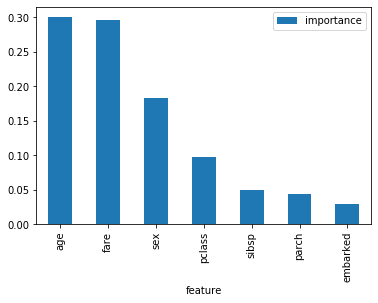

In [28]:
#Visualize the importance
importances.plot.bar()

In [29]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [30]:
# Given the data points would I have survived ? 
# Most likely I would've been in 3rd class (pclass = 3), Im a male (sex = 1), age is older than 18 (age = 21), no siblings onboard (sibsp = 0), 
#no parents or children (parch =0), fare the minimum price (fare = 0), embarked queens town = (embarked =1)
my_survival = [[3,1,21,0, 0, 0, 1]]

#uncomment to see all of the models predictions
#for i in range(len(model)):
#  pred = model[i].predict(my_survival)
#  print(pred)


#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didn’t make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didn’t make it


In [32]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

print('[6]Random Forest Classifier Training Accuracy:', xgb.score(X_train, Y_train))

cm = confusion_matrix(Y_test, xgb.predict(X_test))

#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = confusion_matrix(Y_test, xgb.predict(X_test)).ravel()

print(cm)
print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line


[6]Random Forest Classifier Training Accuracy: 0.8822495606326889
[[74  8]
 [16 45]]
Model[6] Testing Accuracy = "0.8321678321678322 !"



In [38]:
#Print Prediction of Random Forest Classifier model
pred = xgb.predict(X_test)
print(pred)

#Print a space
print(np.sum((pred == Y_test)))
print(pred.shape)

#Print the actual values
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]
119
(143,)
[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [34]:
pred = xgb.predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You didn’t make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didn’t make it
